In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


C:\Users\LENOVO\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LENOVO\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LENOVO\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LENOVO\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [8]:
train_dir="facial_recognition/Training/Training"
test_dir="facial_recognition/Testing/Testing"

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten

In [25]:
train_datagen=ImageDataGenerator(rescale=1./255,height_shift_range=0.2,width_shift_range=0.2,shear_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [26]:
train_set=train_datagen.flow_from_directory(train_dir,batch_size=64,target_size=(48,48),class_mode="categorical",color_mode="grayscale")
test_set=test_datagen.flow_from_directory(test_dir,batch_size=64,target_size=(48,48),class_mode="categorical",color_mode="grayscale")

Found 18806 images belonging to 4 classes.
Found 4989 images belonging to 4 classes.


In [27]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(48,48,1),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(4,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 2, 2, 128)        

In [29]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [31]:
history=model.fit_generator(train_set,epochs=100,steps_per_epoch=len(train_set),validation_data=test_set)

Epoch 1/100
294/294 [==============================] - 53s 180ms/step - loss: 1.0129 - acc: 0.5693 - val_loss: 0.9722 - val_acc: 0.5883
Epoch 2/100
294/294 [==============================] - 58s 197ms/step - loss: 0.9891 - acc: 0.5809 - val_loss: 0.9368 - val_acc: 0.6097
Epoch 3/100
294/294 [==============================] - 61s 207ms/step - loss: 0.9839 - acc: 0.5824 - val_loss: 0.9611 - val_acc: 0.5841
Epoch 4/100
294/294 [==============================] - 61s 208ms/step - loss: 0.9572 - acc: 0.5999 - val_loss: 0.9173 - val_acc: 0.6158
Epoch 5/100
294/294 [==============================] - 63s 214ms/step - loss: 0.9445 - acc: 0.6021 - val_loss: 0.9012 - val_acc: 0.6304
Epoch 6/100
294/294 [==============================] - 62s 211ms/step - loss: 0.9318 - acc: 0.6048 - val_loss: 0.9001 - val_acc: 0.6190
Epoch 7/100
294/294 [==============================] - 62s 211ms/step - loss: 0.9242 - acc: 0.6104 - val_loss: 0.8884 - val_acc: 0.6288
Epoch 8/100
294/294 [===========================

In [32]:
model.save('face.h5')

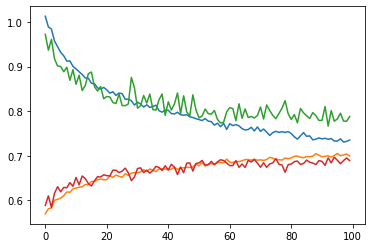

In [33]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['acc'],label='training accuracy')
plt.plot(history.history['val_loss'],label='testing loss')
plt.plot(history.history['val_acc'],label='testing accuracy')